In [2]:
import numpy as np

In [3]:
class1_data = np.loadtxt('nls_data/class1.txt', delimiter=',')
class2_data = np.loadtxt('nls_data/class2.txt', delimiter=',')

In [4]:
class1_label = np.zeros((class1_data.shape[0], 1))  #Label for class1 is 0
class2_label = np.ones((class2_data.shape[0], 1))   #Label for class2 is 1

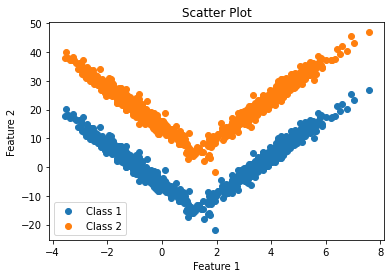

In [9]:
import matplotlib.pyplot as plt

#f1 = [d[0] for d in class1_data[0]]
#f2 = [d[1] for d in class1_data[1]]

plt.scatter(class1_data[:, 0], class1_data[:, 1], label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], label='Class 2')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot")

plt.legend()
plt.show()

In [5]:
# Combining data and labels
data = np.concatenate((class1_data, class2_data), axis=0)
labels = np.concatenate((class1_label, class2_label), axis=0)

In [12]:
# Shuffling the data
shuffled_indices = np.random.permutation(data.shape[0])
data = data[shuffled_indices]
labels = labels[shuffled_indices]
data
labels
print(data.shape)
print(labels.shape)

(2000, 2)
(2000, 1)


In [14]:
normalized_data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = normalized_data
data

array([[-1.23436452,  1.07127737],
       [ 1.15818754, -0.41124902],
       [ 0.51292624,  0.3128196 ],
       ...,
       [ 0.98551516,  1.04226178],
       [ 0.83126268,  0.75340268],
       [ 1.58549893,  0.52605987]])

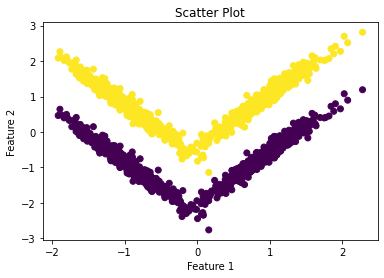

In [16]:
import matplotlib.pyplot as plt

f1 = [d[0] for d in data]
f2 = [d[1] for d in data]


plt.scatter(f1,f2, c=labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot")

plt.show()

In [21]:
#Splitting data for training and testing

train_ratio = 0.8  
train_size = int(data.shape[0] * train_ratio)
train_data = data[:train_size]
train_labels = labels[:train_size]
test_data = data[train_size:]
test_labels = labels[train_size:]

print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(1600, 2)
(400, 2)
(1600, 1)
(400, 1)


In [39]:
#Architecture of the neural network
input_size = data.shape[1]  #Number of features
hidden_size = 256
output_size = 2

In [93]:
#Initializing weights and biases
np.random.seed(42)
wh = np.random.randn(input_size, hidden_size) * 0.01
bh = np.zeros((1, hidden_size))
wo = np.random.randn(hidden_size, output_size) * 0.01
bo = np.zeros((1, output_size))


array([[0., 0.]])

In [54]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [87]:
# Model Training

epochs = 100
learning_rate = 0.01
losses = []

for epoch in range(epochs):
    
    # Forward Computation
    hidden_layer_activation = np.dot(train_data, wh) + bh
    hidden_layer_output = sigmoid(hidden_layer_activation)
    output_layer_activation = np.dot(hidden_layer_output, wo) + bo
    predicted_labels = sigmoid(output_layer_activation)
    
    #Loss function
    loss = np.mean(np.square(predicted_labels - train_labels))
    losses.append(loss)
    
    # Backpropagation
    error = train_labels - predicted_labels
    d_predicted_labels = error * sigmoid_derivative(predicted_labels)
    error_hidden = d_predicted_labels.dot(wo.T)
    d_hidden_layer = error_hidden * sigmoid_derivative(hidden_layer_output)
    
    # Weight and bias updation
    wo += hidden_layer_output.T.dot(d_predicted_labels) * learning_rate
    bo += np.sum(d_predicted_labels, axis=0, keepdims=True) * learning_rate
    wh += train_data.T.dot(d_hidden_layer) * learning_rate
    bh += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

<ipython-input-54-6bb1af10151c>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [90]:
# Predict on train data
hidden_layer_activation_train = np.dot(train_data, wh) + bh
hidden_layer_output_train = sigmoid(hidden_layer_activation_train)
output_layer_activation_train = np.dot(hidden_layer_output_train, wo) + bo
predicted_labels_train = sigmoid(output_layer_activation_train)
predicted_labels_train = np.round(predicted_labels_train).astype(int)

print("Loss:", losses)
print("Predicted labels for train data:", predicted_labels_train.flatten())
print("Actual labels:", train_labels.flatten())

#Accuracy
accuracy = (predicted_labels_train == train_labels).mean() * 100
print("Accuracy:", accuracy, "%")

Loss: [0.04312493782595871, 0.04249994785602885, 0.04249995414714281, 0.042499959668074634, 0.042499964512887914, 0.04249996876558981, 0.04249997250076319, 0.04249997578383104, 0.04249997867159719, 0.04249998121320311, 0.04249998345125586, 0.042499985422885425, 0.042499987160618515, 0.04249998869301764, 0.04249999004504283, 0.04249999123819184, 0.04249999229070154, 0.04249999321804582, 0.0424999940336085, 0.04249999474949674, 0.04249999537743138, 0.0424999959287358, 0.04249999641344784, 0.0424999968399964, 0.04249999721547406, 0.04249999754595308, 0.04249999783670288, 0.04249999809234248, 0.04249999831693582, 0.04249999851683132, 0.04312499868667827, 0.043124998889394535, 0.04312499906052576, 0.04312499920509498, 0.04312499932727207, 0.04312499943053059, 0.04312499951778235, 0.043124999591494274, 0.043124999653781255, 0.04312499970645559, 0.043124999751046195, 0.043124999788824996, 0.043124999820820784, 0.04312499984770714, 0.04312499987046918, 0.04312499988981863, 0.043124999906267475

<ipython-input-54-6bb1af10151c>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [91]:
#Model Testing

hidden_layer_activation = np.dot(test_data, wh) + bh
hidden_layer_output = sigmoid(hidden_layer_activation)
output_layer_activation = np.dot(hidden_layer_output, wo) + bo
predicted_labels = sigmoid(output_layer_activation)
predicted_labels = np.round(predicted_labels).astype(int)

print("Loss:", losses)
print("Predicted labels:", predicted_labels.flatten())
print("Actual labels:", test_labels.flatten())

#Accuracy
accuracy = (predicted_labels == test_labels).mean() * 100
print("Accuracy:", accuracy, "%")

Loss: [0.04312493782595871, 0.04249994785602885, 0.04249995414714281, 0.042499959668074634, 0.042499964512887914, 0.04249996876558981, 0.04249997250076319, 0.04249997578383104, 0.04249997867159719, 0.04249998121320311, 0.04249998345125586, 0.042499985422885425, 0.042499987160618515, 0.04249998869301764, 0.04249999004504283, 0.04249999123819184, 0.04249999229070154, 0.04249999321804582, 0.0424999940336085, 0.04249999474949674, 0.04249999537743138, 0.0424999959287358, 0.04249999641344784, 0.0424999968399964, 0.04249999721547406, 0.04249999754595308, 0.04249999783670288, 0.04249999809234248, 0.04249999831693582, 0.04249999851683132, 0.04312499868667827, 0.043124998889394535, 0.04312499906052576, 0.04312499920509498, 0.04312499932727207, 0.04312499943053059, 0.04312499951778235, 0.043124999591494274, 0.043124999653781255, 0.04312499970645559, 0.043124999751046195, 0.043124999788824996, 0.043124999820820784, 0.04312499984770714, 0.04312499987046918, 0.04312499988981863, 0.043124999906267475

<ipython-input-54-6bb1af10151c>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
